In [ ]:
# 🧠 TaskButler: Your Smart Personal Productivity Assistant
'A mini Python project that analyzes user input, sets priorities, tracks time spent on tasks, and suggests improvements — powered by NLP and Data Analytics.'


In [ ]:
'''🎯 Project Objective:
- Help users organize their tasks
- Predict completion time based on past habits
- Prioritize tasks smartly using basic NLP
- Give performance insights using data visualizations'''

In [ ]:
!pip install nltk
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from datetime import datetime
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Tokenization failed: 
**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt_tab')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt_tab/english/

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

Butler 🤯: Task added: 'Submit Python project by next week' with a deadline on 2025-04-14
Butler 👔: Task added: 'Submit Python project by next week' with a deadline on 2025-04-14
Butler 🥂: Deadline? Honey, you already missed three.
Tokenization failed: 
**********************************************************************
  Resource pun

<ipython-input-27-45642203b8d9>:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Priority Score', y='Task', data=df, palette='coolwarm')
<ipython-input-27-45642203b8d9>:140: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


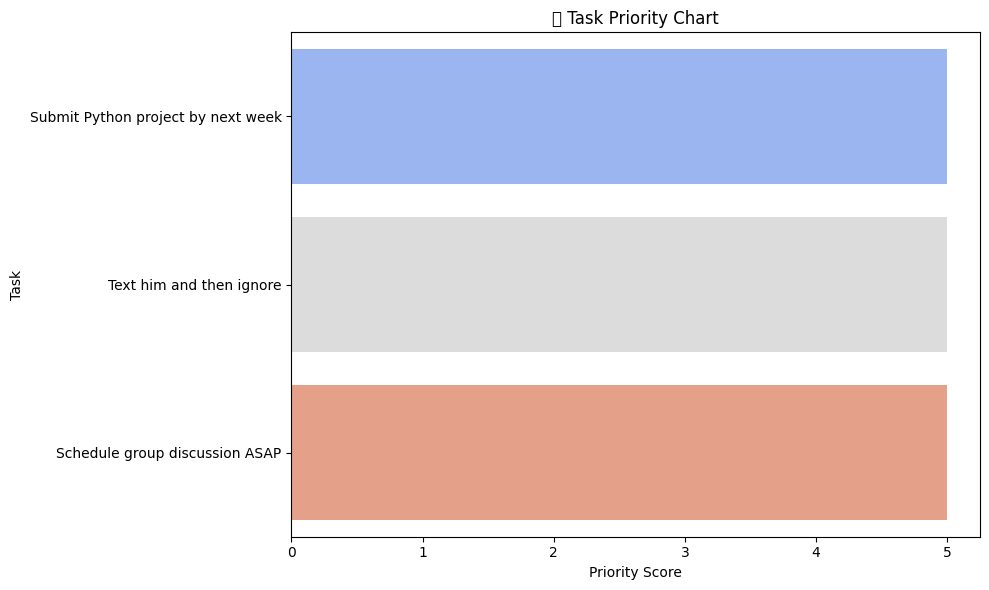

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


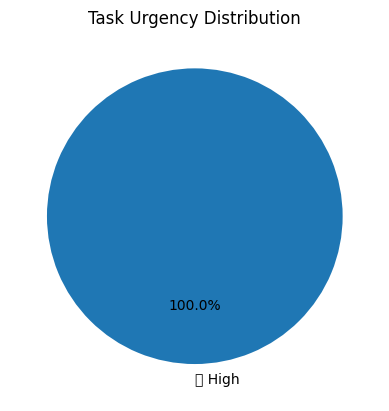

Butler 💾: Tasks exported to 'taskbutler_tasks.csv'. Don't lose it like your motivation.
=== TASKBUTLER SUMMARY ===

Total Tasks: 3

Urgency Breakdown:
Urgency
🚨 High    3
Name: count, dtype: int64
Butler 🥂: If you're skipping anything... I bet it’s 'Submit Python project by next week'. As expected.
Task marked as done and removed: 'Text him and then ignore'

🗂️ Your Task Dashboard:

                                 Task    Deadline  Priority Score Urgency  \
0  Submit Python project by next week  2025-04-14               5  🚨 High   
1      Schedule group discussion ASAP  2025-04-09               5  🚨 High   

   Days Left  
0         -7  
1        -12  


In [ ]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

class TaskButler:
    def __init__(self):
        self.tasks = []

    def _sass(self, message):
        responses = [
            "Oh wow, you’re actually doing something? I'm shook.",
            "Another task? Darling, are you trying to impress someone?",
            "I'll add it, but I won't pretend it's a good idea.",
            "Deadline? Honey, you already missed three.",
            "Noted. Now let's see if you'll *actually* finish it."
        ]
        print("Butler 🤯:", message)
        print("Butler 👔:", message)
        print("Butler 🥂:", np.random.choice(responses))

    def _calculate_priority(self, task_description, deadline=None):
        import nltk.data

        keywords = {
            'urgent': 5, 'immediate': 5, 'asap': 5, 'now': 5,
            'important': 4, 'project': 4, 'exam': 4,
            'soon': 3, 'meeting': 3, 'assignment': 3,
            'later': 1, 'someday': 1
        }

        score = 0

        # Ensure punkt is available
        try:
            nltk.data.find('tokenizers/punkt')
        except LookupError:
            print("Downloading NLTK punkt tokenizer...")
            nltk.download('punkt')

        try:
            tokens = nltk.word_tokenize(task_description.lower())
        except Exception as e:
            print(f"Tokenization failed: {e}")
            tokens = []

        for word in tokens:
            score += keywords.get(word, 0)

        if deadline:
            try:
                days_left = (datetime.strptime(deadline, "%Y-%m-%d") - datetime.today()).days
                if days_left <= 1:
                    score += 5
                elif days_left <= 3:
                    score += 3
                elif days_left <= 7:
                    score += 1
            except Exception as e:
                print(f"Error parsing deadline: {e}")

        return score

    def add_task(self, description, deadline):
        score = self._calculate_priority(description, deadline)
        try:
            deadline_date = datetime.strptime(deadline, "%Y-%m-%d").date()
            days_left = (deadline_date - datetime.today().date()).days
            urgency = '🚨 High' if days_left <= 2 else '⚠️ Medium' if days_left <= 5 else '✅ Low'
        except ValueError:
            urgency = '❗ Invalid Date'
            days_left = 'Invalid'

        task = {
            "Task": description,
            "Deadline": deadline,
            "Priority Score": score,
            "Urgency": urgency,
            "Days Left": days_left
        }

        self.tasks.append(task)
        self._sass(f"Task added: '{description}' with a deadline on {deadline}")

    def list_tasks(self):
        if not self.tasks:
            print("Butler 👔: You have no tasks. You must be proud of your procrastination.")
            return
        df = pd.DataFrame(self.tasks)
        print("\n🗂️ Your Task Dashboard:\n")
        print(df)

    def mark_task_done(self, description):
        before = len(self.tasks)
        self.tasks = [t for t in self.tasks if t['Task'].lower() != description.lower()]
        after = len(self.tasks)
        print(f"Task marked as done and removed: '{description}'") if before != after else print("Task not found.")

    def remove_task(self, description):
        self.mark_task_done(description)

    def export_tasks(self, filename="taskbutler_tasks.csv"):
        if not self.tasks:
            print("Butler 💾: No tasks to export. Are you even trying?")
            return
        df = pd.DataFrame(self.tasks)
        df.to_csv(filename, index=False)
        print(f"Butler 💾: Tasks exported to '{filename}'. Don't lose it like your motivation.")

    def roast_me(self):
        if not self.tasks:
            print("Butler 🥂: Shocking. Not a single task? Planning to fail gracefully, I see.")
        else:
            worst = min(self.tasks, key=lambda x: x["Priority Score"])
            print(f"Butler 🥂: If you're skipping anything... I bet it’s '{worst['Task']}'. As expected.")

    def view_upcoming_tasks(self, days=3):
        today = datetime.today().date()
        upcoming = [t for t in self.tasks if isinstance(t['Days Left'], int) and t['Days Left'] <= days]
        if not upcoming:
            print(f"No tasks due in the next {days} days.")
        else:
            print(f"Tasks due in the next {days} days:")
            for task in upcoming:
                print(f"- {task['Task']} | Due: {task['Deadline']} | Urgency: {task['Urgency']}")

    def plot_priority_chart(self):
        if not self.tasks:
            print("No tasks to plot.")
            return
        df = pd.DataFrame(self.tasks)
        df = df.sort_values(by='Priority Score', ascending=False)
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Priority Score', y='Task', data=df, palette='coolwarm')
        plt.title('🧠 Task Priority Chart')
        plt.xlabel('Priority Score')
        plt.ylabel('Task')
        plt.tight_layout()
        plt.show()

    def plot_urgency_distribution(self):
        if not self.tasks:
            print("No tasks to plot.")
            return
        df = pd.DataFrame(self.tasks)
        urgency_count = df['Urgency'].value_counts()
        urgency_count.plot(kind='pie', autopct='%1.1f%%', startangle=90)
        plt.title("Task Urgency Distribution")
        plt.ylabel('')
        plt.show()

    def generate_summary(self):
        df = pd.DataFrame(self.tasks)
        print("=== TASKBUTLER SUMMARY ===")
        print("\nTotal Tasks:", len(df))
        print("\nUrgency Breakdown:")
        print(df['Urgency'].value_counts())

        with open("TaskButler_Report.txt", "w") as file:
            file.write("TASKBUTLER - TASK MANAGEMENT SYSTEM\n")
            file.write("===================================\n\n")
            file.write("TASK LIST:\n")
            for task in self.tasks:
                file.write(f"- {task['Task']} | Due: {task['Deadline']} | Urgency: {task['Urgency']}\n")


# === USAGE === #
butler = TaskButler()
butler.add_task("Submit Python project by next week", "2025-04-14")
butler.add_task("Text him and then ignore", "2025-04-10")
butler.add_task("Schedule group discussion ASAP", "2025-04-09")

butler.list_tasks()
butler.view_upcoming_tasks()
butler.plot_priority_chart()
butler.plot_urgency_distribution()
butler.export_tasks()
butler.generate_summary()
butler.roast_me()
butler.mark_task_done("Text him and then ignore")
butler.list_tasks()


In [ ]:
# --------------------- Execution --------------------- #



butler = TaskButler()

# Add sample tasks
butler.add_task("Submit Python project by next week", "2025-04-14")
butler.add_task("Ignore him like he’s a spam call", "2025-04-08")
butler.add_task("Rule GD prep like a legend", "2025-04-10")

# Display task list
print("\n--- Task List ---")
butler.list_tasks()

# Roast session
print("\n--- Roast ---")
butler.roast_me()

# Export tasks
print("\n--- Exporting Tasks ---")
butler.export_tasks("TaskButler_Report.csv")

# Upcoming tasks
print("\n--- Upcoming Tasks (Next 3 Days) ---")
butler.view_upcoming_tasks()

# Mark a task done
print("\n--- Marking Task as Done ---")
butler.mark_task_done("Ignore him like he’s a spam call")

# Final task summary
print("\n--- Final Summary ---")
butler.show_summary()


Butler 👔: Task added: 'Submit Python project by next week' with a deadline on 2025-04-14
Butler 🥂: Another task? Darling, are you trying to impress someone?
Butler 👔: Task added: 'Ignore him like he’s a spam call' with a deadline on 2025-04-08
Butler 🥂: Noted. Now let's see if you'll *actually* finish it.
Butler 👔: Task added: 'Rule GD prep like a legend' with a deadline on 2025-04-10
Butler 🥂: I'll add it, but I won't pretend it's a good idea.

--- Task List ---
Butler 👔: Here’s your majestic list of undone tasks:
 1. Submit Python project by next week - Due: 2025-04-14 | Score: 5 | Urgency: ✅ Low
 2. Ignore him like he’s a spam call - Due: 2025-04-08 | Score: 5 | Urgency: 🚨 High
 3. Rule GD prep like a legend - Due: 2025-04-10 | Score: 3 | Urgency: ⚠️ Medium

--- Roast ---
Butler 🥂: If you're skipping anything... I bet it’s 'Rule GD prep like a legend'. As expected.

--- Exporting Tasks ---
Butler 💾: Tasks exported to 'TaskButler_Report.csv'. Don't lose it like your motivation.

--- 


--- Priority Chart ---


<ipython-input-3-ca7a669fda75>:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Priority Score', y='Task', data=df, palette='coolwarm')
<ipython-input-3-ca7a669fda75>:126: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


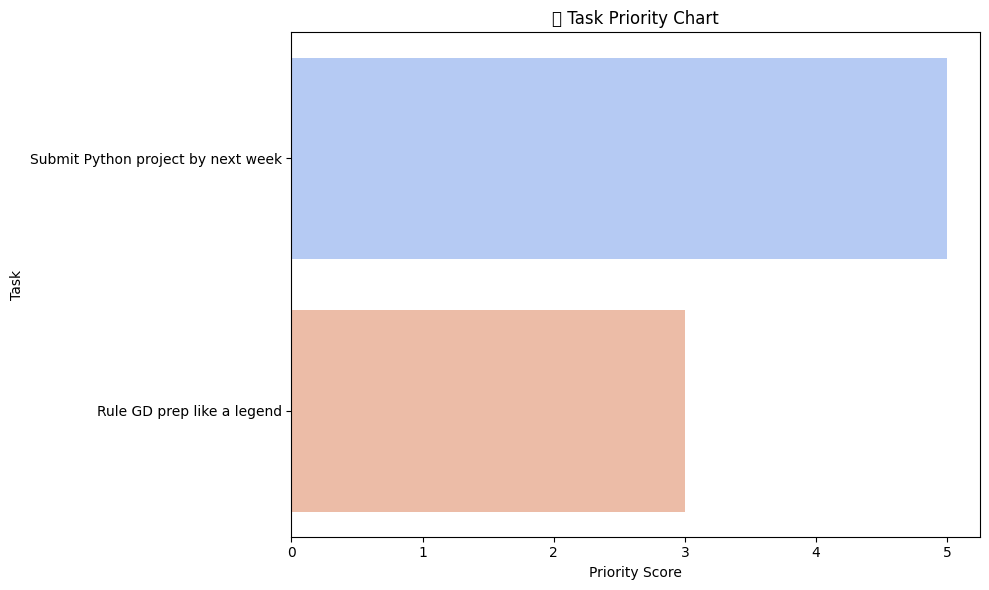


--- Urgency Pie Chart ---


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


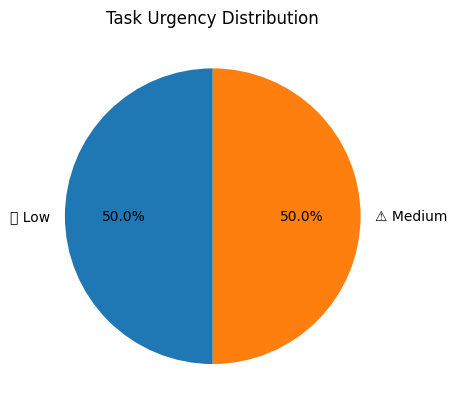

In [ ]:
print("\n--- Priority Chart ---")
butler.plot_priority_chart()

print("\n--- Urgency Pie Chart ---")
butler.plot_urgency_pie()
